In [1]:
import pandas as pd 
import numpy as np 
from datetime import datetime 
import seaborn as sns 
import matplotlib.pyplot as plt
import os, sys 
%matplotlib inline 

In [2]:
df = pd.read_csv('./TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
stock = df[['Date','Close']]
stock.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20280\688752022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Date'] = pd.to_datetime(stock['Date'])


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2416 non-null   datetime64[ns]
 1   Close   2416 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.9 KB


In [6]:
stock.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [7]:
stock_data = stock.set_index('Date')

In [8]:
stock_data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [9]:
stock_data.describe()

,Close
count,2416.000000
mean,186.403651
std,119.136020
min,15.800000
25%,34.400002
50%,212.960007
75%,266.774994
max,780.000000


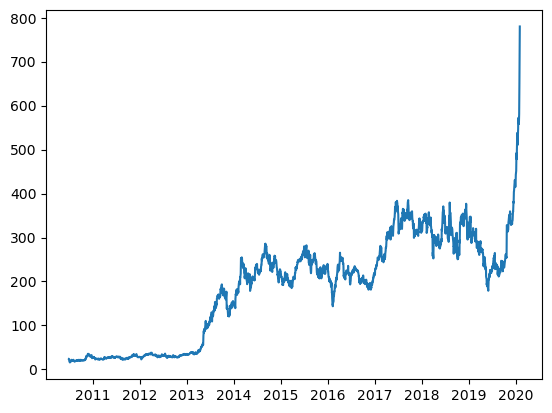

In [10]:
plt.plot(stock_data.Close)

(array([729., 142., 720., 520., 275.,  12.,   9.,   6.,   2.,   1.]),
 array([ 15.8 ,  92.22, 168.64, 245.06, 321.48, 397.9 , 474.32, 550.74,
        627.16, 703.58, 780.  ]),
 <BarContainer object of 10 artists>)

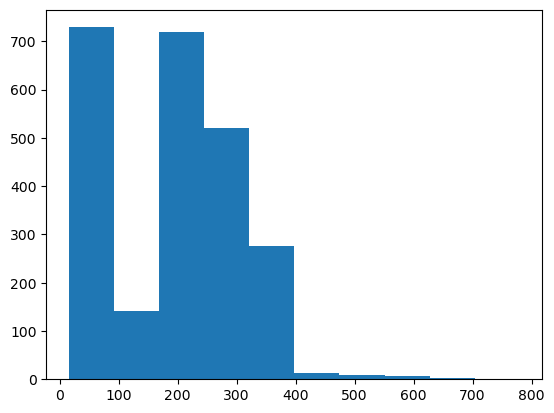

In [11]:
plt.hist(stock_data.Close)

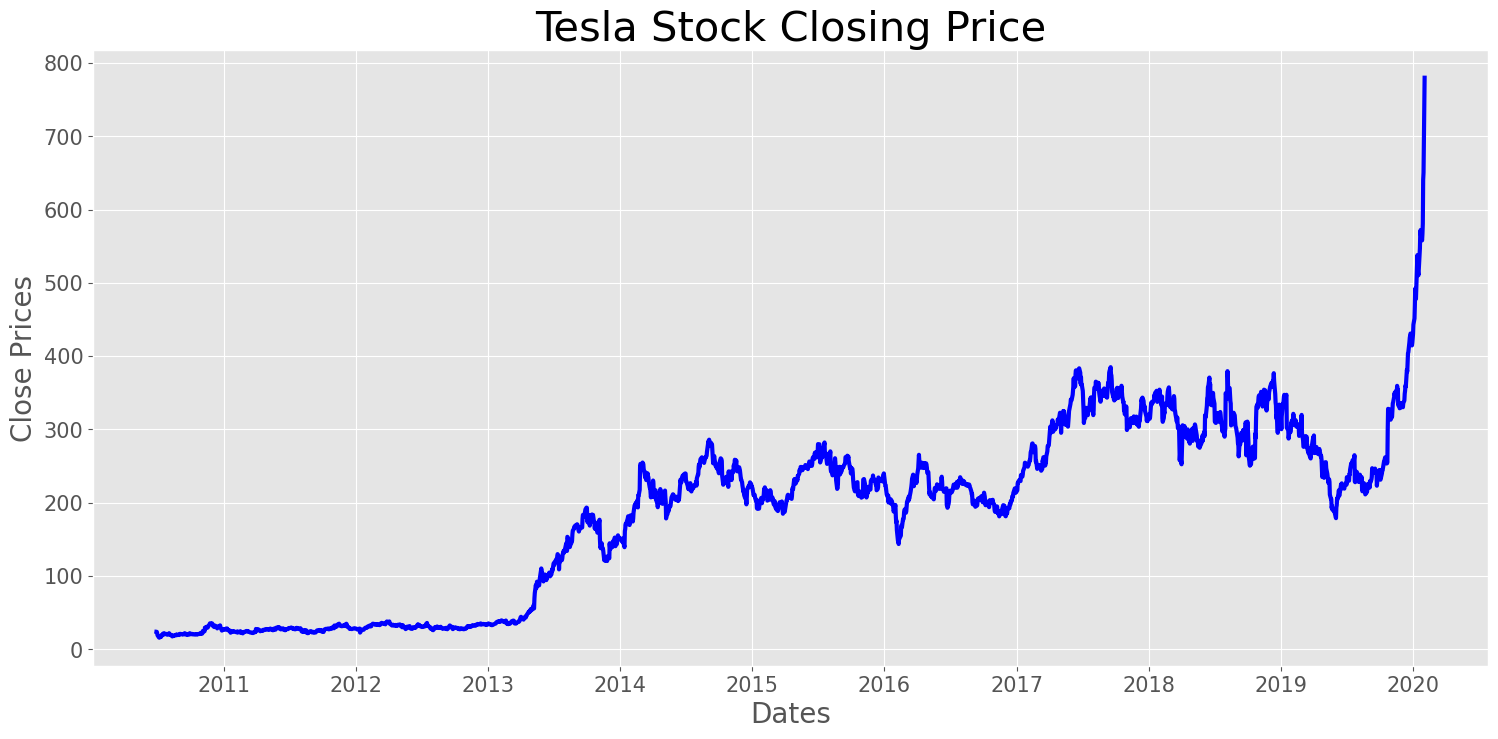

In [12]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

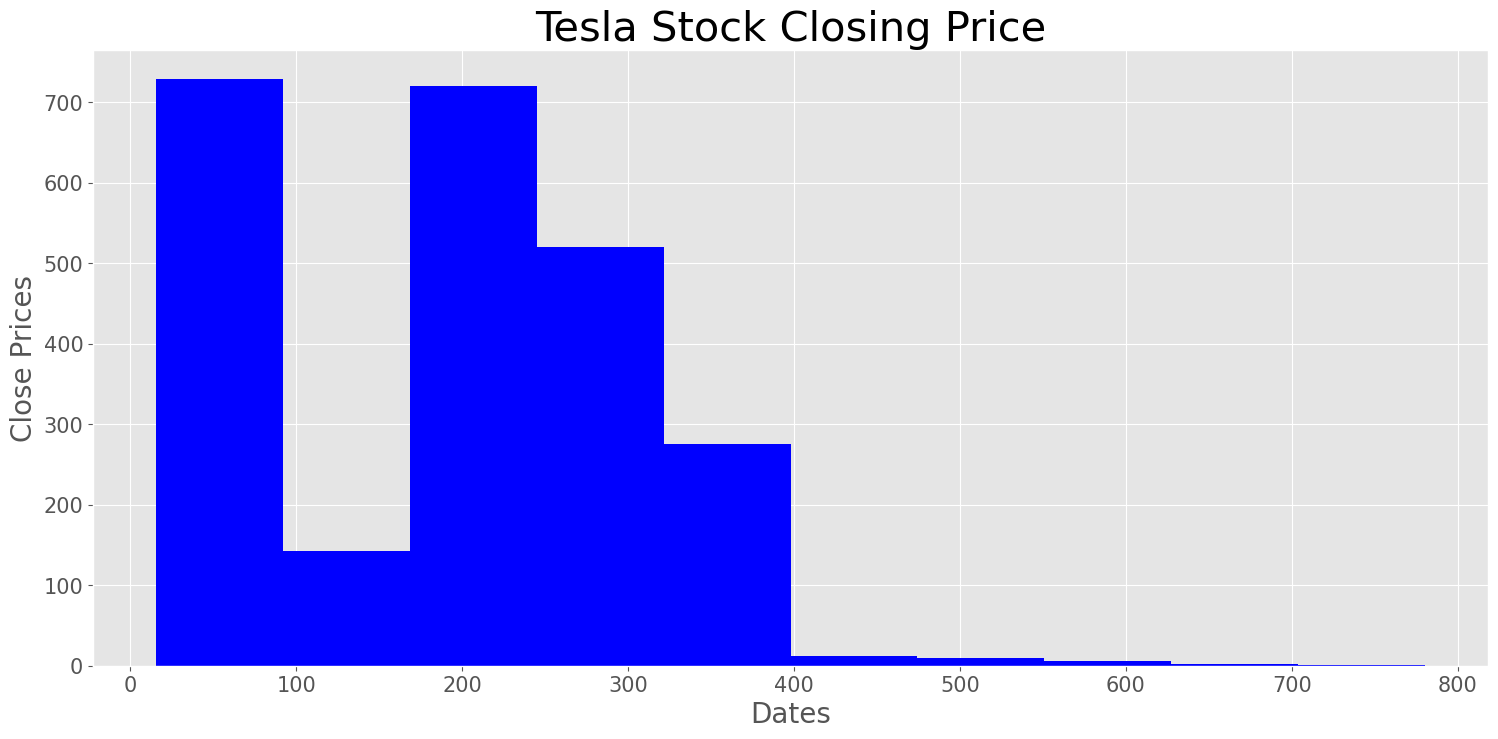

In [13]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

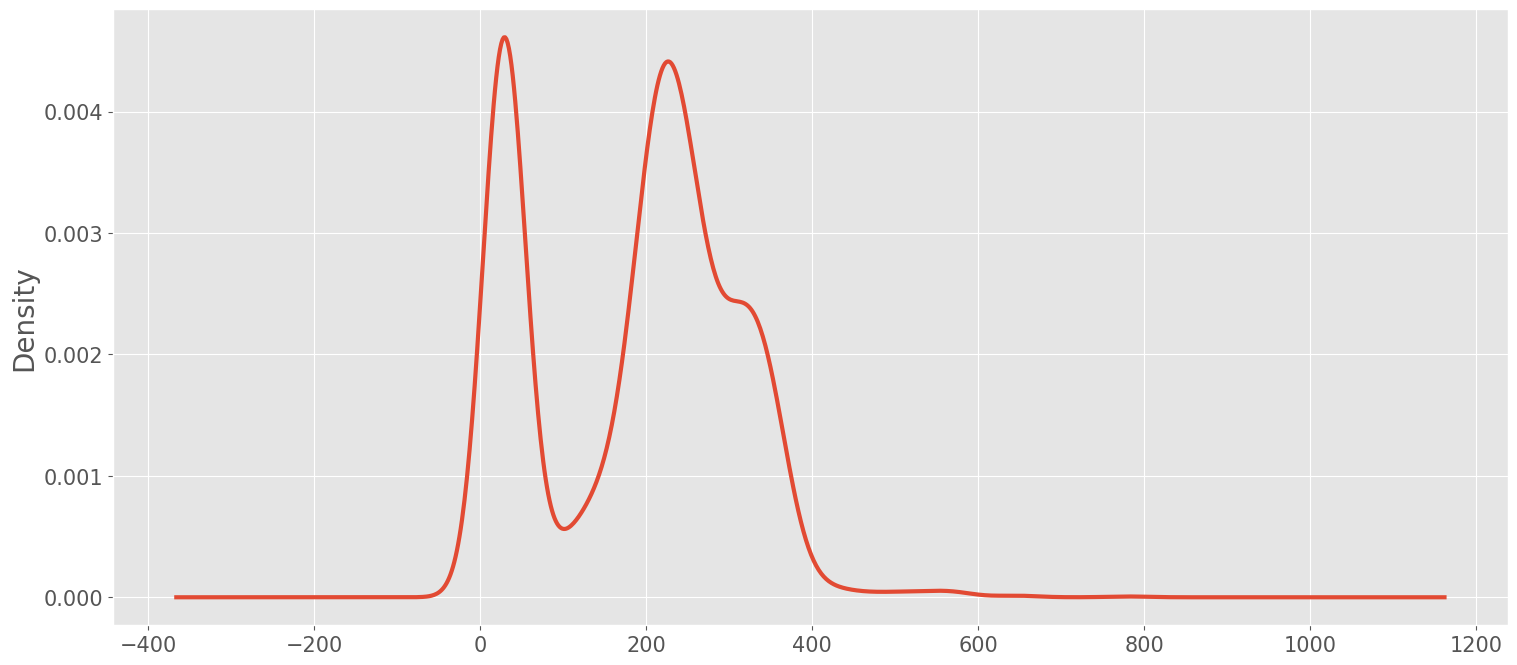

In [14]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

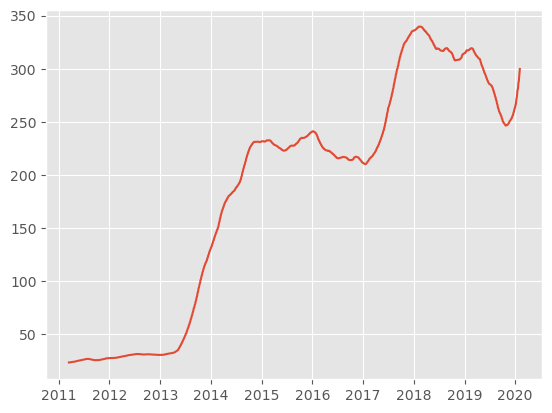

In [15]:
rollingMean = stock_data['Close'].rolling(180).mean()
plt.plot(rollingMean)

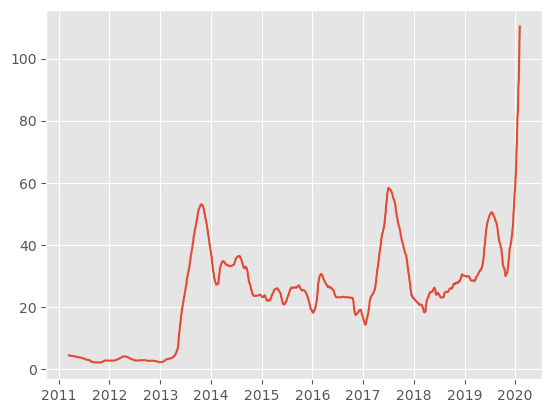

In [16]:
rollingSTD = stock_data['Close'].rolling(180).std()
plt.plot(rollingSTD)

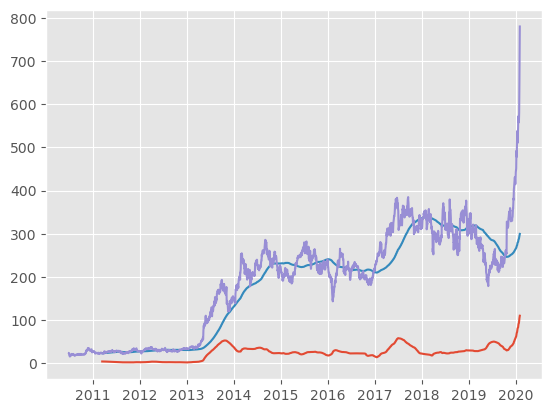

In [17]:
plt.plot(rollingSTD)
plt.plot(rollingMean)
plt.plot(stock_data['Close'])

In [18]:
from statsmodels.tsa.stattools import adfuller

stats_report = adfuller(stock_data['Close'])
stats_report

(1.4000685020861612,
 0.9971144530803391,
 18,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16128.395638116252)

In [19]:
pd.Series(stats_report[:4], index=['test stats', 'p-value', 'lag', 'data points'])

test stats        1.400069
p-value           0.997114
lag              18.000000
data points    2397.000000
dtype: float64

In [20]:
def testStationarity(data):
    rollingMean = data.rolling(48).mean()
    rollingSTD = data.rolling(48).std()
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(data, color='blue',label='Original', linewidth = 3)
    plt.plot(rollingMean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rollingSTD, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Dickey Fuller Test")
    fuller_test = adfuller(data, autolag='AIC')
    output = pd.Series(fuller_test[:4], index=['test stats', 'p-value', 'lag', 'data points'])
    for key, value in fuller_test[4].items():
        output['critical (%s)' %key] = value

    print(output)

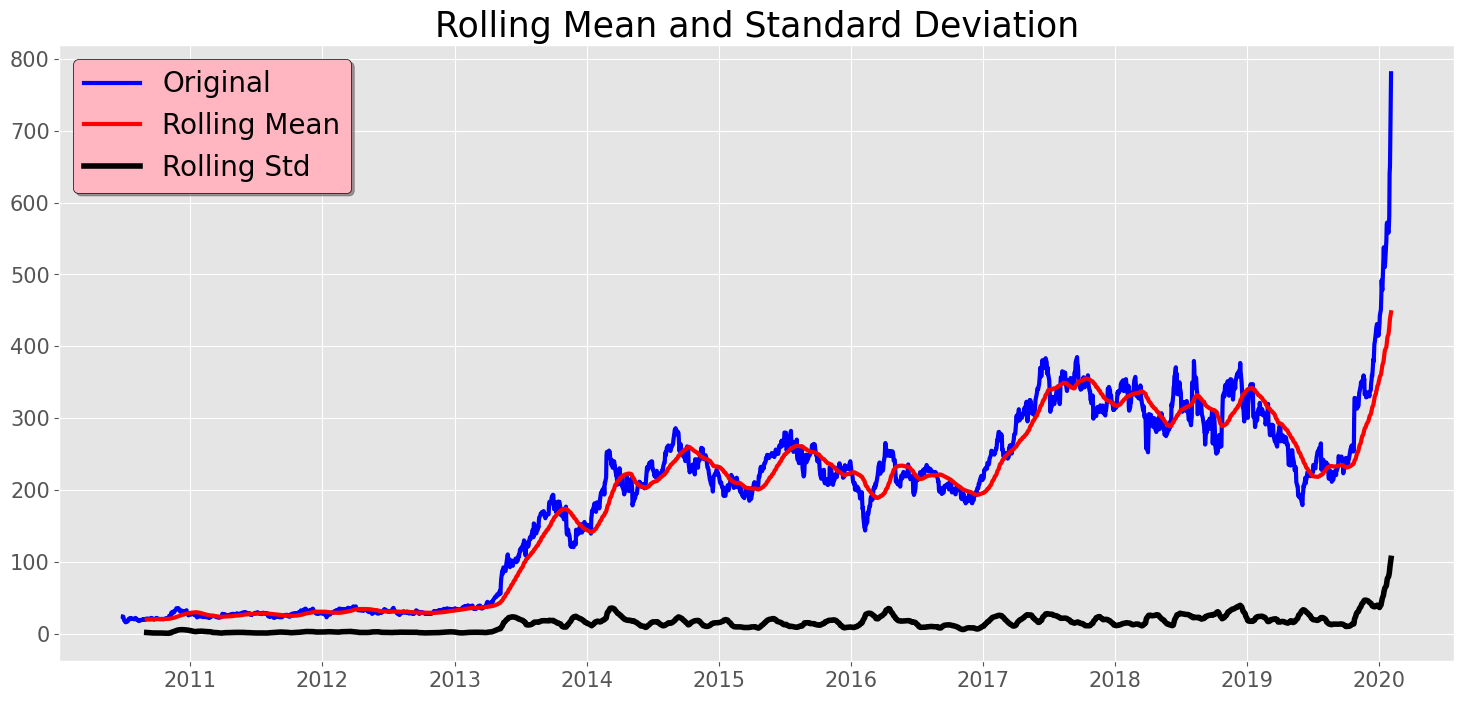

Dickey Fuller Test
test stats           1.400069
p-value              0.997114
lag                 18.000000
data points       2397.000000
critical (1%)       -3.433081
critical (5%)       -2.862747
critical (10%)      -2.567412
dtype: float64


In [21]:
testStationarity(stock_data['Close'])

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'], period=12)

In [23]:
result1 = seasonal_decompose(stock_data['Close'], period=12, model="multiplicative")

<Figure size 2000x1000 with 0 Axes>

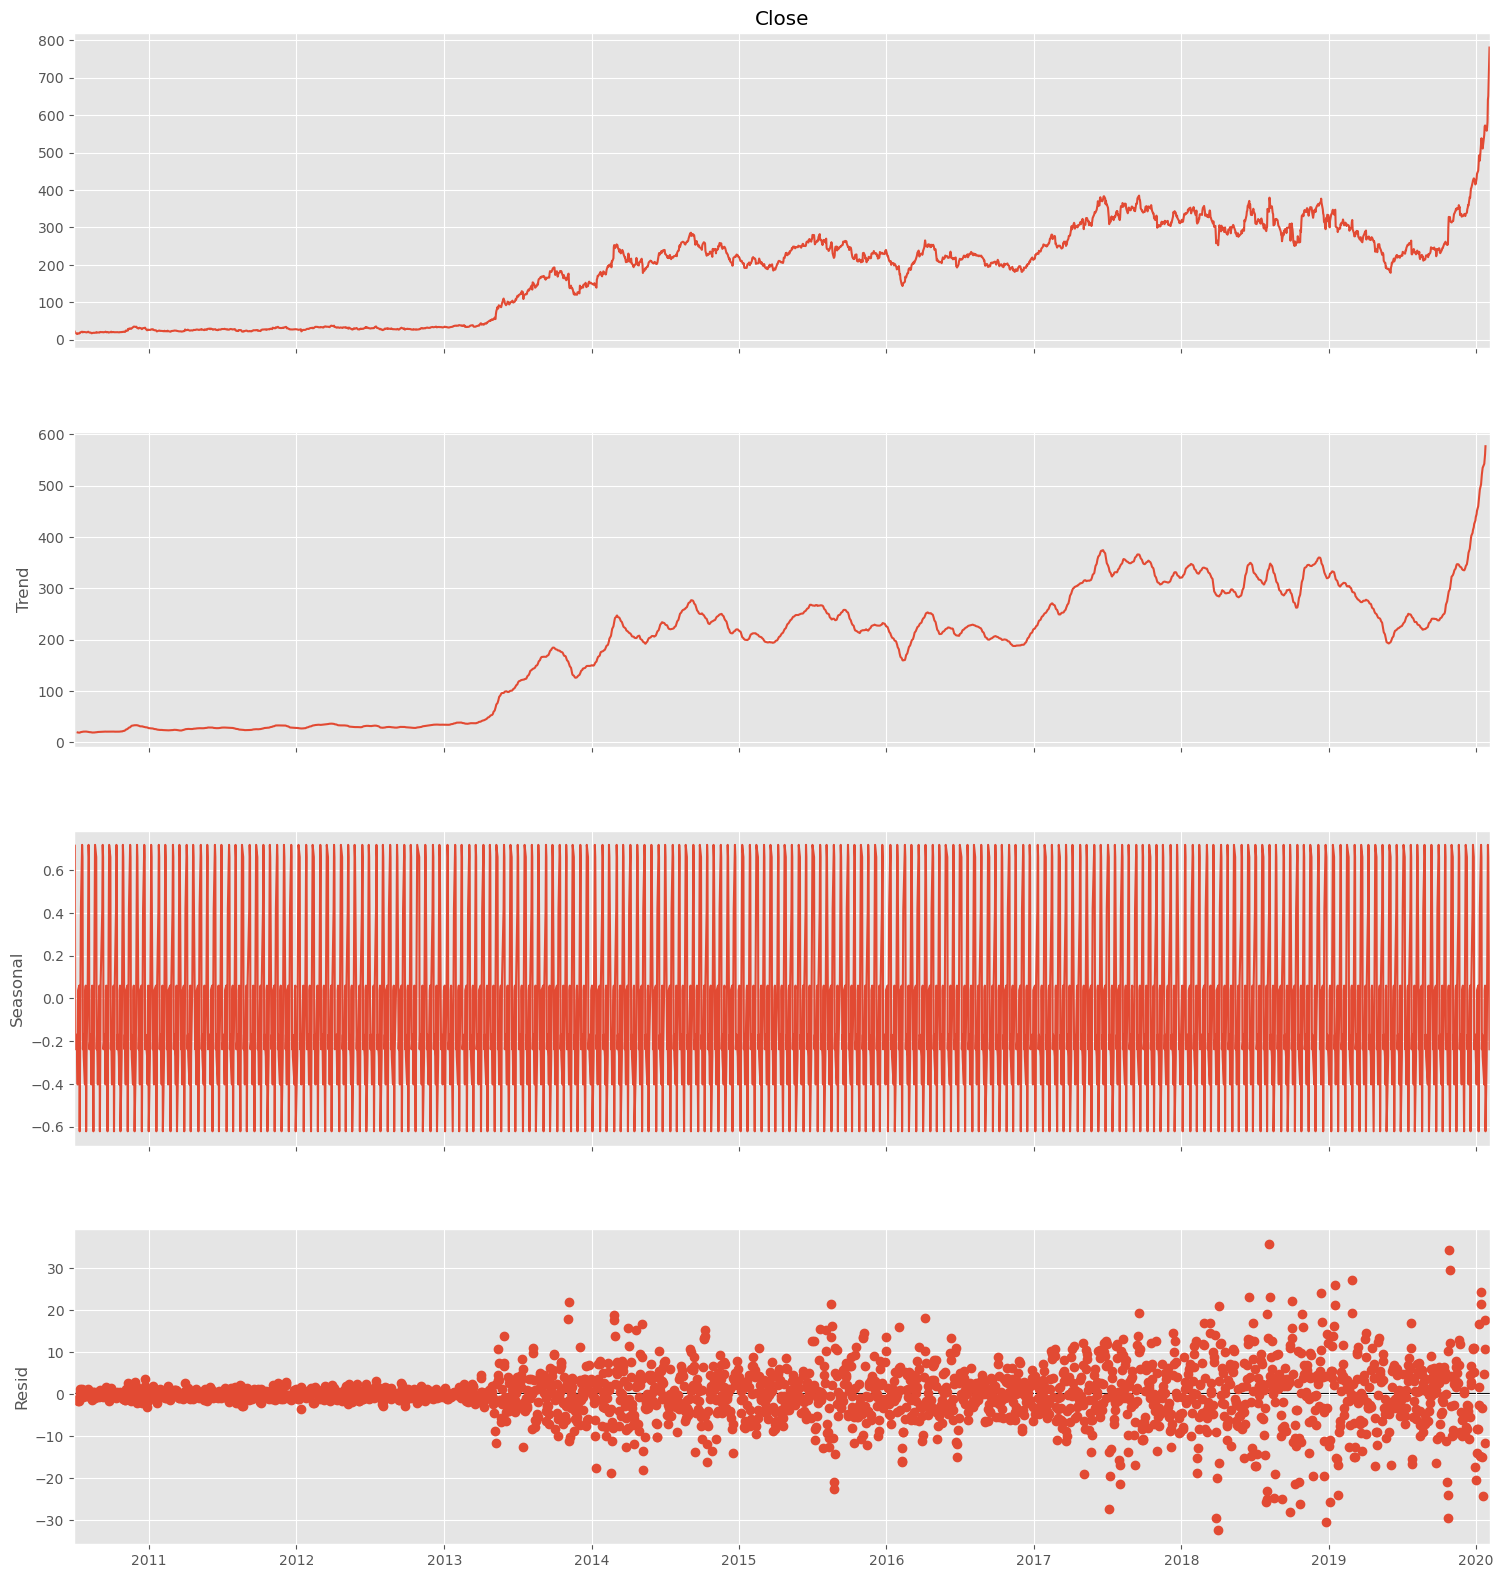

In [24]:
fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,18)

<Figure size 2000x1000 with 0 Axes>

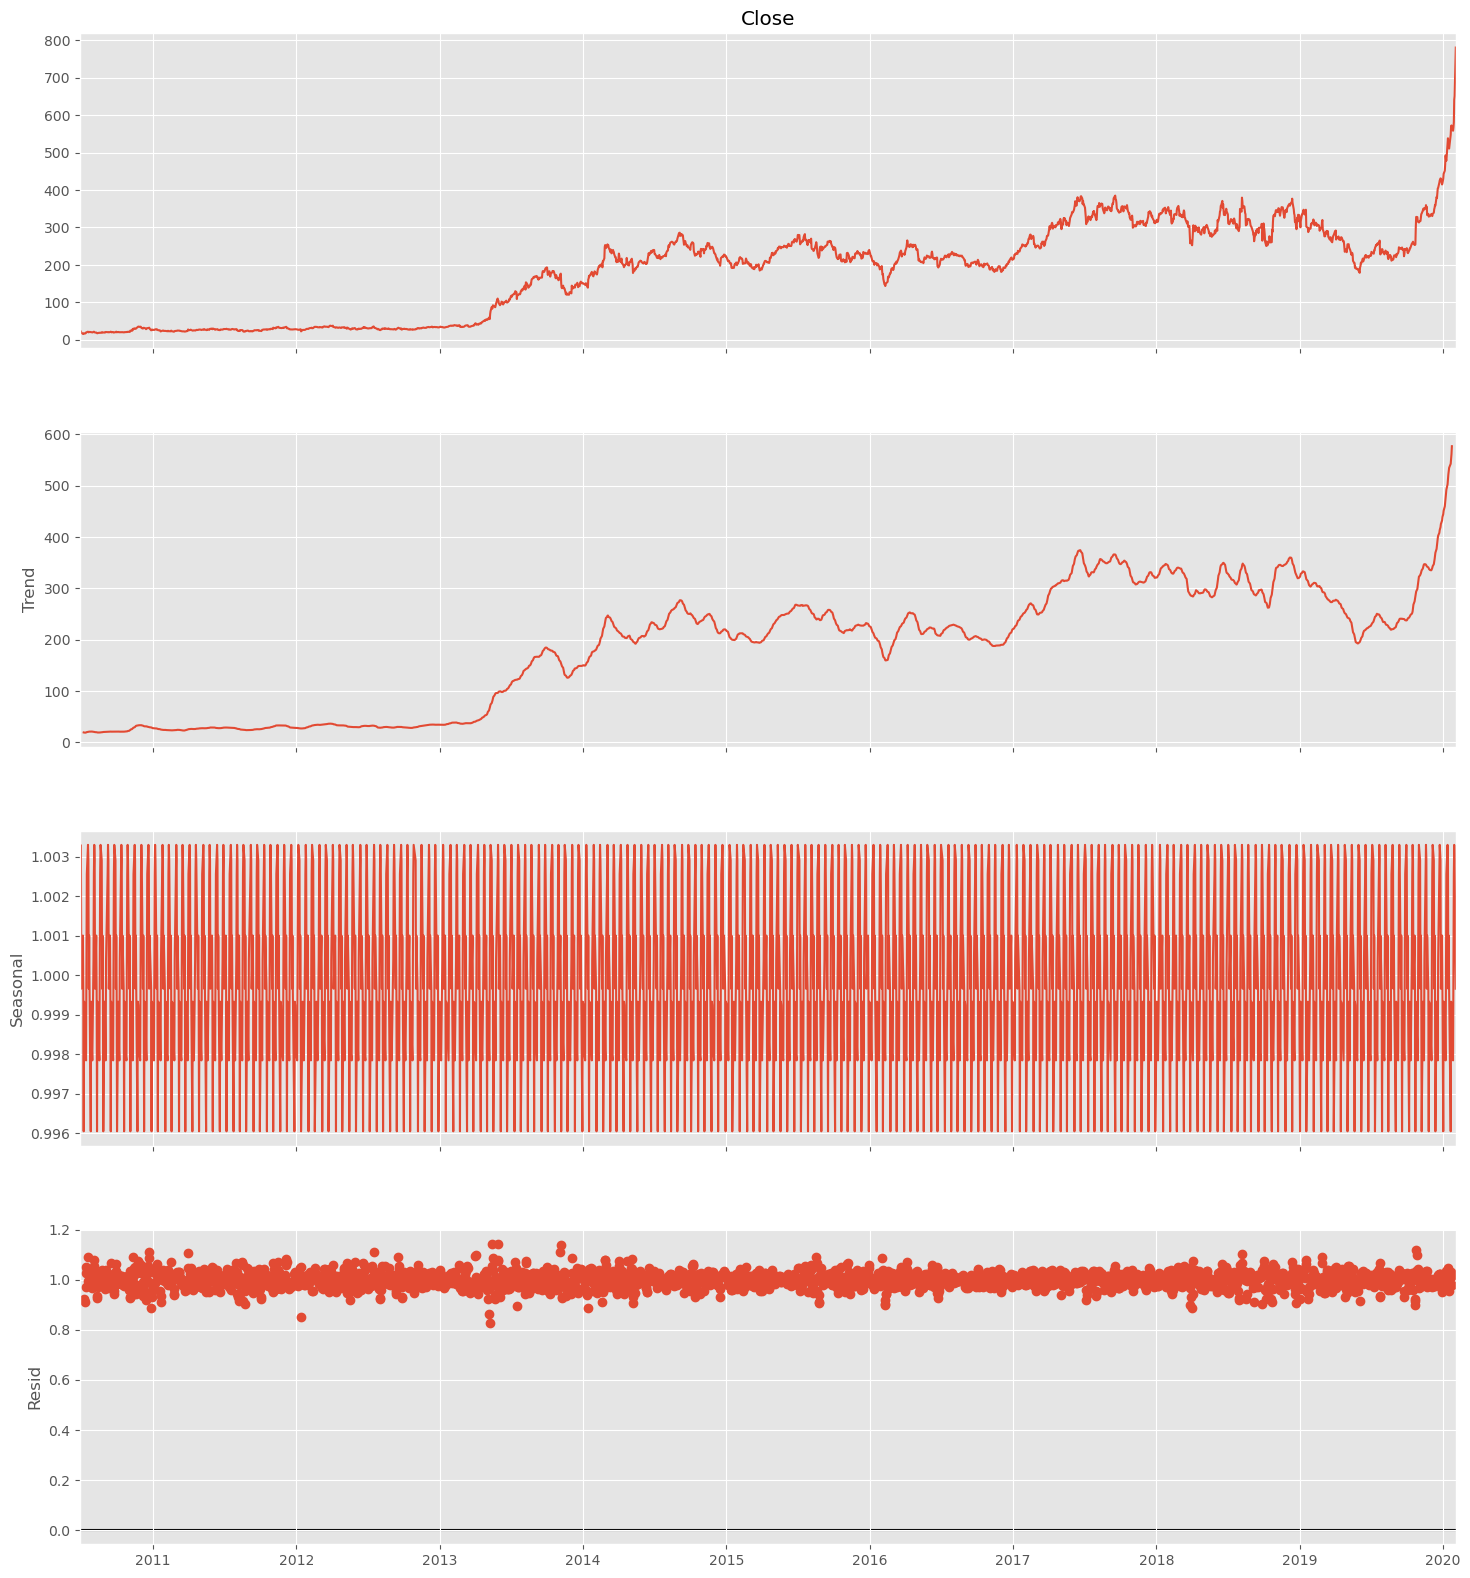

In [25]:
fig = plt.figure(figsize=(20,10))
fig = result1.plot()
fig.set_size_inches(17,18)

c:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

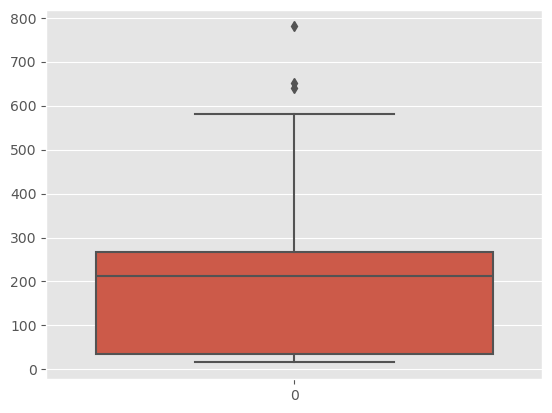

In [26]:
sns.boxplot(stock_data['Close'])

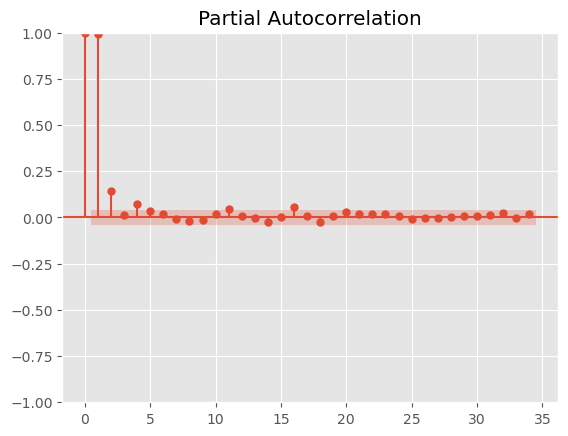

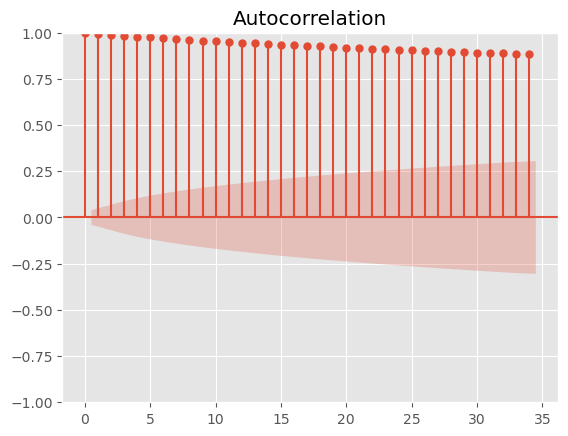

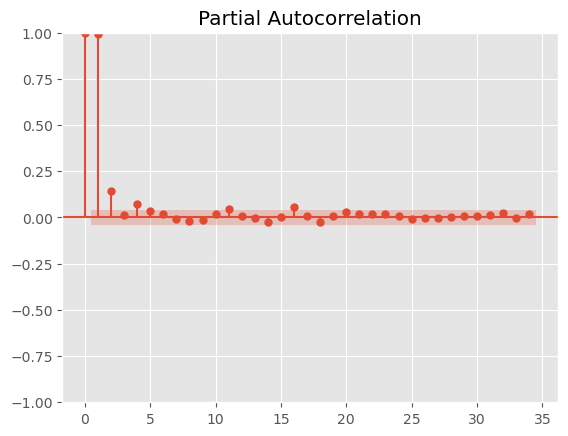

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

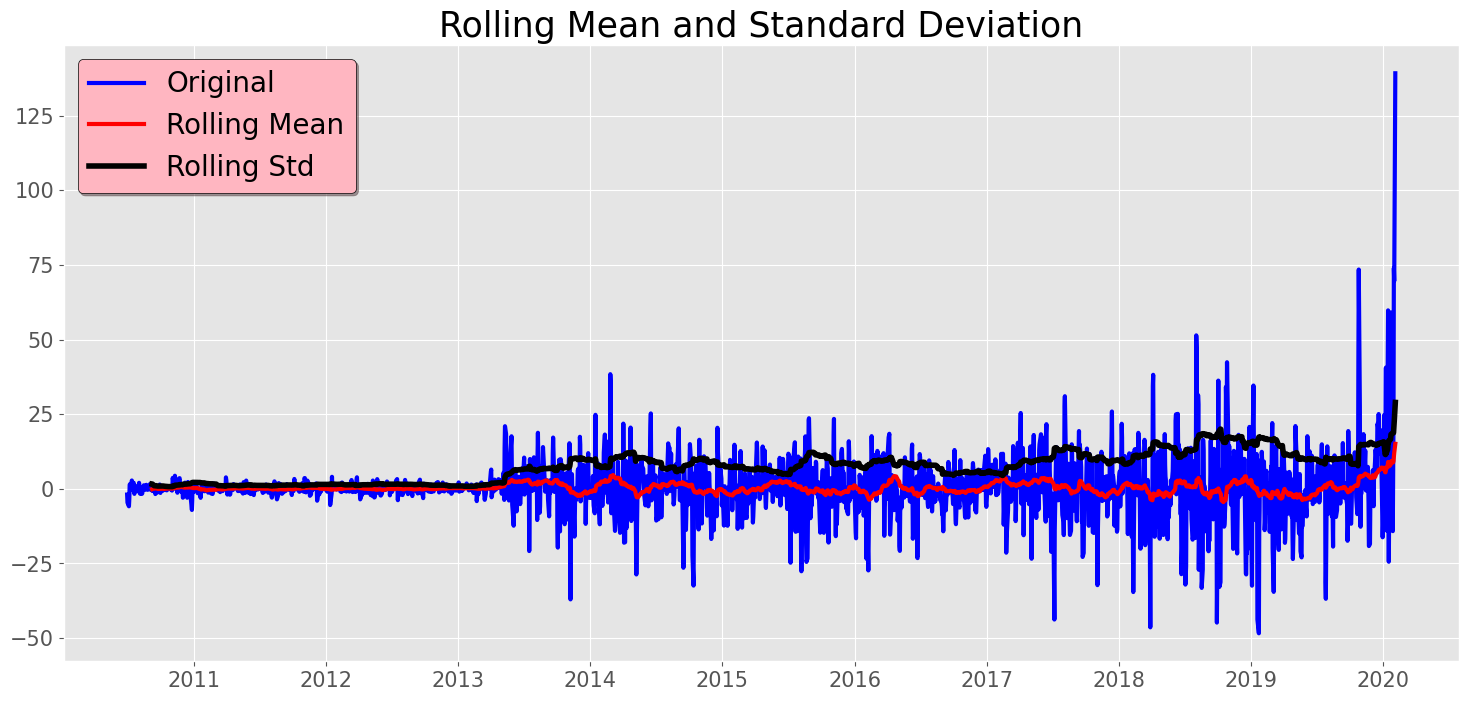

Dickey Fuller Test
test stats          -3.903998
p-value              0.002006
lag                 26.000000
data points       2387.000000
critical (1%)       -3.433092
critical (5%)       -2.862752
critical (10%)      -2.567415
dtype: float64


In [28]:
# Non Stationary to Stationary Converison
df_Close = stock_data['Close'].diff(2)
df_Close = df_Close.dropna()
testStationarity(df_Close)

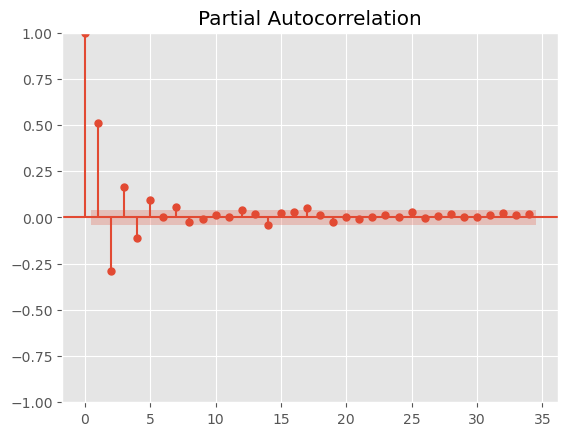

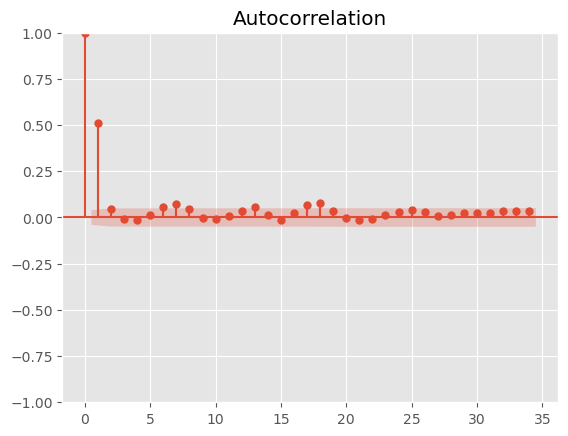

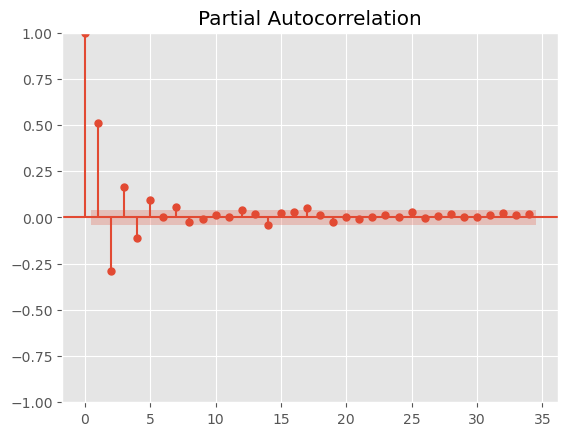

In [53]:
plot_acf(df_Close)
plot_pacf(df_Close)

In [29]:
len(stock_data)

2416

In [36]:
(2416*70//100)

1691

In [37]:
(2416*30//100)

724

In [38]:
train_data = stock_data['Close'][0:(2416*70//100)]
test_data = stock_data['Close'][(2416*70//100):]

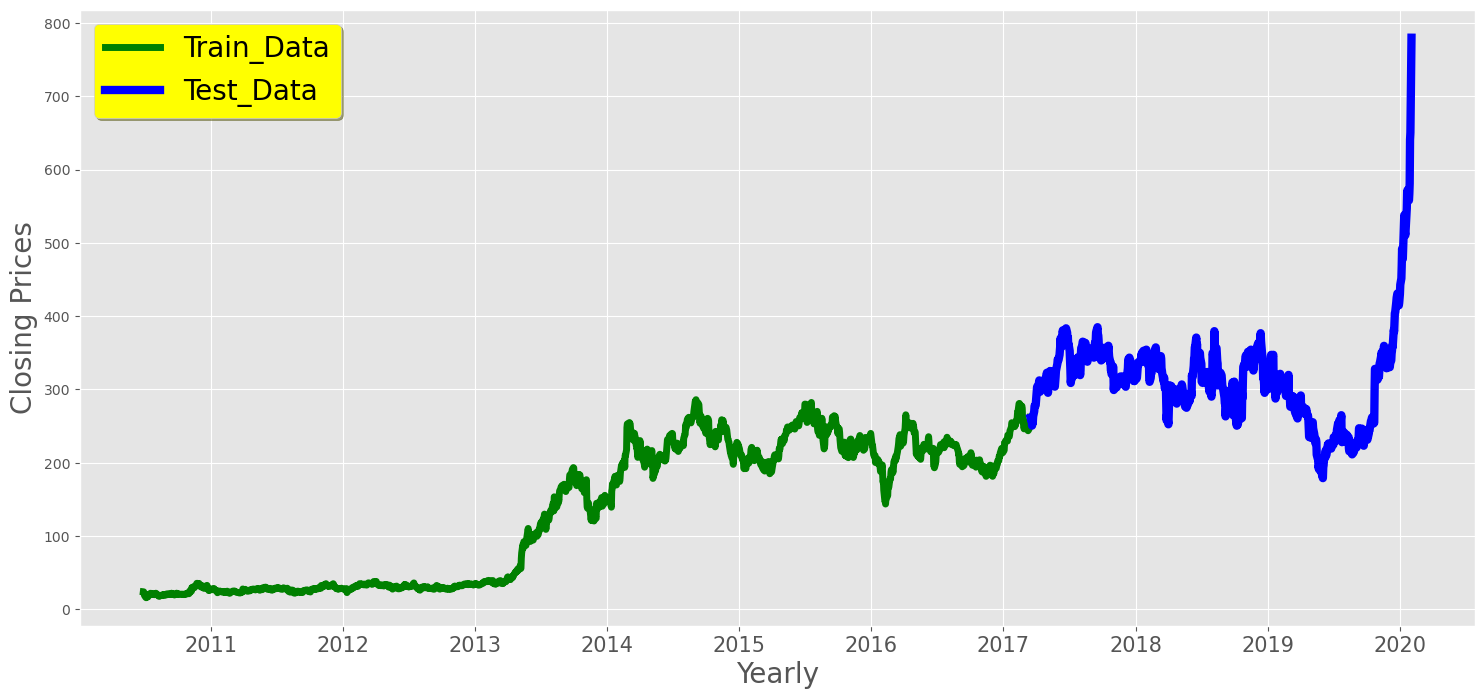

In [48]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Yearly', fontsize= 20)
plt.ylabel('Closing Prices', fontsize= 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label='Train_Data', linewidth=5)
plt.plot(test_data, 'blue', label='Test_Data', linewidth=6)
plt.legend(fontsize= 20, shadow=True, facecolor='yellow')

In [53]:
import statsmodels.api as sm 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [51]:
history = [x for x in train_data]
len(history)

1691

In [54]:
# order > p,d,q
model = ARIMA(history, order=(1,1,1))

In [55]:
model

In [56]:
model = model.fit() 

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1691
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4898.452
Date:                Wed, 14 Feb 2024   AIC                           9802.905
Time:                        11:28:05   BIC                           9819.202
Sample:                             0   HQIC                          9808.940
                               - 1691                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0243      0.630      0.039      0.969      -1.211       1.259
ma.L1          0.0074      0.632      0.012      0.991      -1.231       1.246
sigma2        19.2807      0.313     61.520      0.000      18.666      19.895
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3578.16
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              28.04   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model.forecast()

array([262.25081143])

In [62]:
test_data.iloc[0]

261.5

In [64]:
mean_squared_error([test_data.iloc[0]], model.forecast())

0.5637178053313313

In [65]:
np.sqrt(mean_squared_error([test_data.iloc[0]], model.forecast()))

0.7508114312737462

In [67]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   -------- ------------------------------- 133.1/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------------- ------------------ 1.5/2.8 MB 30.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 27.5 MB/s eta 0:00:01
   ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [74]:
import pmdarima as pm 
import itertools
import warnings
warnings.filterwarnings('ignore')

In [93]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse



def evaluate_arima_models(X, y, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    
    # Generate all possible combinations of p, d, and q values
    orders = list(itertools.product(p_values, d_values, q_values))
    
    for order in orders:
        rmse = train_arima_model(X, y, order)
        if rmse < best_score:
            best_score, best_cfg = rmse, order
        print('ARIMA%s RMSE=%.3f' % (order, rmse))
    
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))



In [94]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)


evaluate_arima_models(train_data,test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=162.997
ARIMA(0, 0, 1) RMSE=85.817


KeyboardInterrupt: 

In [81]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 11.038467214562514
